In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import cv2
import dlib
import os
import keras
import sklearn

In [3]:
from os import listdir
from os.path import isfile, join


In [17]:
pathFolder = "./faces/"

In [20]:
FolderPath = [f for f in listdir(pathFolder)]

In [21]:
print(FolderPath)

['Abel_DIDOU', 'Adrien_HOUEE', 'Alexandre_PERZO-JOLY', 'Carl_SIGNOR', 'Gabriel_RANSON', 'Haris_BENDAHMANE', 'Mohammed-Ali_CENGIZ', 'Poupee_GONFLABLE', 'Romain_MOREAU', 'Thibault_BLANCHARD', 'Thomas_BLUSSON', 'Vincent_DAMOUR']


In [26]:
pose68 = dlib.shape_predictor('models/shape_predictor_68_face_landmarks.dat')
pose05 = dlib.shape_predictor('models/shape_predictor_5_face_landmarks.dat')

def face_landmarks(face, model="large"):
    
    if model == "large":
        predictor = pose68
    elif model == "small":
        predictor = pose05
    
    if not isinstance(face, list):
        rect = dlib.rectangle(0,0,face.shape[1],face.shape[0])
        return predictor(face, rect)
    else:
        rect = dlib.rectangle(0,0,face[0].shape[1],face[0].shape[0])
        return [predictor(f,rect) for f in face]

In [27]:
def shape_to_coords(shape):
    return np.float32([[p.x, p.y] for p in shape.parts()])

In [28]:
TEMPLATE = np.float32([
    (0.0792396913815, 0.339223741112), (0.0829219487236, 0.456955367943),
    (0.0967927109165, 0.575648016728), (0.122141515615, 0.691921601066),
    (0.168687863544, 0.800341263616), (0.239789390707, 0.895732504778),
    (0.325662452515, 0.977068762493), (0.422318282013, 1.04329000149),
    (0.531777802068, 1.06080371126), (0.641296298053, 1.03981924107),
    (0.738105872266, 0.972268833998), (0.824444363295, 0.889624082279),
    (0.894792677532, 0.792494155836), (0.939395486253, 0.681546643421),
    (0.96111933829, 0.562238253072), (0.970579841181, 0.441758925744),
    (0.971193274221, 0.322118743967), (0.163846223133, 0.249151738053),
    (0.21780354657, 0.204255863861), (0.291299351124, 0.192367318323),
    (0.367460241458, 0.203582210627), (0.4392945113, 0.233135599851),
    (0.586445962425, 0.228141644834), (0.660152671635, 0.195923841854),
    (0.737466449096, 0.182360984545), (0.813236546239, 0.192828009114),
    (0.8707571886, 0.235293377042), (0.51534533827, 0.31863546193),
    (0.516221448289, 0.396200446263), (0.517118861835, 0.473797687758),
    (0.51816430343, 0.553157797772), (0.433701156035, 0.604054457668),
    (0.475501237769, 0.62076344024), (0.520712933176, 0.634268222208),
    (0.565874114041, 0.618796581487), (0.607054002672, 0.60157671656),
    (0.252418718401, 0.331052263829), (0.298663015648, 0.302646354002),
    (0.355749724218, 0.303020650651), (0.403718978315, 0.33867711083),
    (0.352507175597, 0.349987615384), (0.296791759886, 0.350478978225),
    (0.631326076346, 0.334136672344), (0.679073381078, 0.29645404267),
    (0.73597236153, 0.294721285802), (0.782865376271, 0.321305281656),
    (0.740312274764, 0.341849376713), (0.68499850091, 0.343734332172),
    (0.353167761422, 0.746189164237), (0.414587777921, 0.719053835073),
    (0.477677654595, 0.706835892494), (0.522732900812, 0.717092275768),
    (0.569832064287, 0.705414478982), (0.635195811927, 0.71565572516),
    (0.69951672331, 0.739419187253), (0.639447159575, 0.805236879972),
    (0.576410514055, 0.835436670169), (0.525398405766, 0.841706377792),
    (0.47641545769, 0.837505914975), (0.41379548902, 0.810045601727),
    (0.380084785646, 0.749979603086), (0.477955996282, 0.74513234612),
    (0.523389793327, 0.748924302636), (0.571057789237, 0.74332894691),
    (0.672409137852, 0.744177032192), (0.572539621444, 0.776609286626),
    (0.5240106503, 0.783370783245), (0.477561227414, 0.778476346951)])

TPL_MIN, TPL_MAX = np.min(TEMPLATE, axis=0), np.max(TEMPLATE, axis=0)
MINMAX_TEMPLATE = (TEMPLATE - TPL_MIN) / (TPL_MAX - TPL_MIN)

INNER_EYES_AND_BOTTOM_LIP = np.array([39, 42, 57])
OUTER_EYES_AND_NOSE = np.array([36, 45, 33])

In [29]:
def align_faces(images, landmarks, idx=INNER_EYES_AND_BOTTOM_LIP):
    faces = []
    for (img, marks) in zip(images, landmarks):
        imgDim = img.shape[0]
        coords = shape_to_coords(marks)
        H = cv2.getAffineTransform(coords[idx], imgDim * MINMAX_TEMPLATE[idx])
        warped = cv2.warpAffine(img, H, (imgDim, imgDim))
        faces.append(warped)
    return faces

In [96]:
faces = []
for image in imagePaths : 
    faces.append(cv2.cvtColor(cv2.resize(cv2.imread(path + image),(128,128)), cv2.COLOR_BGR2RGB))


In [97]:
landmarks = face_landmarks(faces)

In [98]:
aligned = align_faces(faces, landmarks)

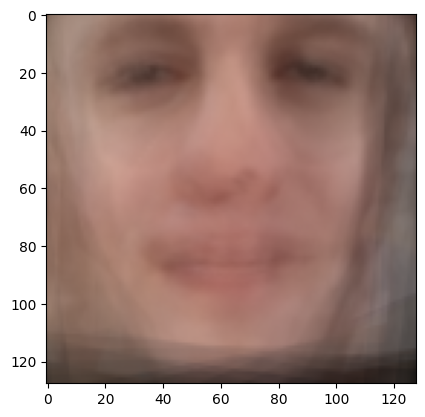

In [47]:
plt.imshow( np.stack(aligned, axis=3).astype(np.float32).mean(axis=3)/255 )

In [50]:
for folder in FolderPath : 
    
    imagePaths = [f for f in listdir(pathFolder + folder) if isfile(join(pathFolder + folder, f))]
    
    faces = []
    for image in imagePaths : 
        faces.append(cv2.cvtColor(cv2.resize(cv2.imread(pathFolder+ folder + "/"+ image),(128,128)), cv2.COLOR_BGR2RGB))
    
    landmarks = face_landmarks(faces)
    aligned = align_faces(faces, landmarks)
    print((np.stack(aligned, axis=3).astype(np.float32).mean(axis=3)/255).shape)
    cv2.imwrite("./mergeFace/" + folder + ".jpg",cv2.cvtColor( np.array((np.stack(aligned, axis=3).astype(np.float32).mean(axis=3))),cv2.COLOR_BGR2RGB)
                
                
                
                
                
                
                
                

(128, 128, 3)


error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'imwrite'
> Overload resolution failed:
>  - Can't parse 'params'. Input argument doesn't provide sequence protocol
>  - Can't parse 'params'. Input argument doesn't provide sequence protocol
